In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
from matplotlib.ticker import FormatStrFormatter
from matplotlib import rcParams,font_manager,colors,patches
from fourinarowfunctions import *

%load_ext autoreload
%autoreload 2

In [2]:
rcParams['figure.figsize'] = (6,6) #figure size in inches
rcParams['font.family'] = "sans-serif" 
rcParams['font.weight'] = "roman" 
rcParams['font.style'] = "normal" # not 100% sure what this does but it was recommended
rcParams['font.size'] = 32 # not 100% sure what this does but it was recommended
rcParams['pdf.fonttype'] = 42
rcParams['axes.linewidth'] = 2 #thickness of the border
rcParams['xtick.major.width'] = rcParams['axes.linewidth'] # make sure line widths are consistent
rcParams['ytick.major.width'] = rcParams['axes.linewidth']
rcParams['axes.spines.right'] = False #hides right border
rcParams['axes.spines.top'] = False #hides top
rcParams['legend.frameon'] = False #hides box around the legend
rcParams['legend.fontsize'] = 18 #font size in pt
rcParams['axes.labelsize'] = 32 
rcParams['xtick.labelsize'] = 24
rcParams['ytick.labelsize'] = rcParams['xtick.labelsize']
rcParams['lines.linewidth'] = 3
rcParams['xtick.major.size'] = 5
rcParams['lines.markersize'] = 16
rcParams['ytick.major.size'] = rcParams['xtick.major.size'] 

In [3]:
direc = 'C:/Users/svo/Google Drive/Bas Games/Analysis/'
bayeselo_direc = 'C:/Users/svo/Documents/Sourcetree repos/fourinarow/Analysis notebooks/new/'

In [4]:
with open(direc + 'Ratings/tournament_results_short.txt','r') as f:
    results = [line.split('\t')[:2] + [int(line.split('\t')[2])] for line in f.read().splitlines()]

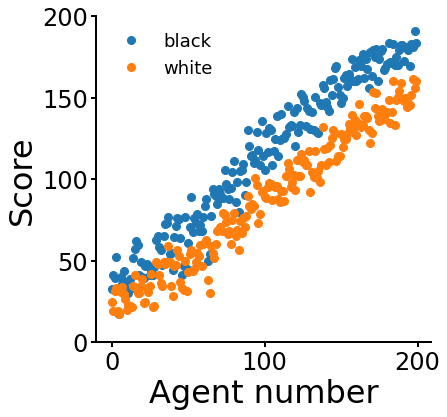

In [5]:
fig,ax=plt.subplots(figsize=(6,6))
ax.xaxis.set_major_formatter(FormatStrFormatter('%g'))
ax.yaxis.set_major_formatter(FormatStrFormatter('%g'))

r = np.loadtxt(direc + 'Ratings/tournament_results_short.txt')
ax.plot([np.sum(1/2+r[r[:,0]==i,2]/2) for i in range(200)],'.',label='black')
ax.plot([np.sum(1/2-r[r[:,1]==i,2]/2) for i in range(200)],'.',label='white')
ax.legend(loc='upper left')
ax.set_xlabel('Agent number')
ax.set_ylabel('Score')
ax.set_ylim([0,200])
plt.show()

In [6]:
create_bayeselo_input(results,direc + 'Ratings/tournament_results_short.pgn')

In [11]:
results

[['0', '0', 1],
 ['0', '1', 1],
 ['0', '2', 1],
 ['0', '3', -1],
 ['0', '4', 0],
 ['0', '5', 1],
 ['0', '6', 1],
 ['0', '7', -1],
 ['0', '8', 1],
 ['0', '9', -1],
 ['0', '10', -1],
 ['0', '11', 1],
 ['0', '12', 1],
 ['0', '13', 1],
 ['0', '14', -1],
 ['0', '15', -1],
 ['0', '16', 1],
 ['0', '17', -1],
 ['0', '18', -1],
 ['0', '19', -1],
 ['0', '20', -1],
 ['0', '21', -1],
 ['0', '22', -1],
 ['0', '23', 1],
 ['0', '24', -1],
 ['0', '25', -1],
 ['0', '26', -1],
 ['0', '27', 0],
 ['0', '28', 0],
 ['0', '29', -1],
 ['0', '30', -1],
 ['0', '31', -1],
 ['0', '32', 1],
 ['0', '33', -1],
 ['0', '34', -1],
 ['0', '35', -1],
 ['0', '36', -1],
 ['0', '37', -1],
 ['0', '38', -1],
 ['0', '39', -1],
 ['0', '40', 1],
 ['0', '41', -1],
 ['0', '42', 0],
 ['0', '43', -1],
 ['0', '44', -1],
 ['0', '45', 0],
 ['0', '46', 1],
 ['0', '47', 0],
 ['0', '48', -1],
 ['0', '49', 1],
 ['0', '50', 0],
 ['0', '51', 0],
 ['0', '52', -1],
 ['0', '53', -1],
 ['0', '54', -1],
 ['0', '55', -1],
 ['0', '56', 1],
 ['0', '

In [10]:
elo = run_bayeselo(bayeselo_direc,[direc + 'Ratings/tournament_results_short.pgn'])

In [ ]:
fig,ax=plt.subplots(figsize=(6,6))
ax.xaxis.set_major_formatter(FormatStrFormatter('%g'))
ax.yaxis.set_major_formatter(FormatStrFormatter('%g'))
ax.plot([elo[str(i)] for i in range(200)],'.')

ax.set_xlabel('Agent number')
ax.set_ylabel('Elo rating')

plt.show()

In [ ]:
ili_direc = 'C:/Users/svo/Documents/FourinarowData/Data/ili/'
df = pd.read_csv(ili_direc + 'forElo.csv')
results = [[row['subject'].split(':')[1],str(row['level']),row['outcome']] if row['user_color']=='black' else
           [str(row['level']),row['subject'].split(':')[1],-row['outcome']] for _,row in df.iterrows()]
create_bayeselo_input(results,ili_direc + 'ili_games.pgn')

In [ ]:
elo = run_bayeselo([direc + 'Ratings/tournament_results_short.pgn',ili_direc + 'ili_games.pgn'])

In [ ]:
{key : val for key,val in elo.items() if key.startswith('R_')}

In [ ]:
elo

In [ ]:
np.savetxt('C:/Users/svo/Documents/Sourcetree repos/fourinarow/elo.txt',[elo[str(i)] for i in range(1650)])

In [ ]:
with open(direc + 'Peak\peak_paper.pgn') as f:
    peak_games = f.read().split('\n\n')

In [ ]:
peak_games_short = '\n\n'.join([game for game in peak_games if '_block' in game] + 
                               list(np.random.choice([game for game in peak_games if not '_block' in game],0,replace=False)))

In [ ]:
with open(direc + 'Peak/peak_games_short.pgn','w') as f:
    print(peak_games_short,file=f)

In [ ]:
elo_peak_games_short = run_bayeselo([direc + 'Peak/peak_games_short.pgn'])

In [ ]:
peak_opponents = [player for player in elo_peak_games_short.keys() if player.startswith('peak_opp')]

In [ ]:
peak_opponents

In [ ]:
plt.plot([elo_peak_games_short[opp] for opp in peak_opponents],'.-')
plt.show()

plt.plot([elo_peak_agents_vs_expt_agents[opp] for opp in peak_opponents],'.-')
plt.show()

plt.plot([elo_peak_games_short[opp] for opp in peak_opponents],
         [elo_peak_agents_vs_expt_agents[opp] for opp in peak_opponents],'.')
plt.show()

In [ ]:
elo_ratings_all = run_bayeselo([direc + 'Peak/peak_vs_expt.pgn',direc + 'Peak/peak_games_short.pgn',
                                direc + 'Ratings/games_results_eye.pgn',direc + 'Ratings/games_results_gen.pgn',
                                direc + 'Ratings/games_results_learn.pgn',direc + 'Ratings/games_results_tai.pgn'])


In [ ]:
import json
with open(direc + 'Ratings/ratings_all_expts_peak.txt','w') as f:
    json.dump(elo_ratings_all,f)

In [ ]:
elo_ratings_all